In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Взглянем на данные

In [2]:
df = pd.read_csv("sql_query.csv")
df.head()

,flight_id,scheduled_departure,scheduled_arrival,scheduled_duration,actual_arrival,actual_duration,departure_city,departure_airport_name,arrival_city,arrival_airport_name,model,range,seats,business_seats,passengers,business_passengers,profit
0,136119,2017-01-03T10:05:00Z,2017-01-03T11:45:00Z,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,2017-01-03T11:49:00Z,0 years 0 mons 0 days 1 hours 41 mins 0.00 secs,Анапа,Витязево,Москва,Шереметьево,Boeing 737-300,4200,130,12,113.0,11.0,1653000.0
1,136120,2017-02-24T10:05:00Z,2017-02-24T11:45:00Z,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,2017-02-24T11:46:00Z,0 years 0 mons 0 days 1 hours 39 mins 0.00 secs,Анапа,Витязево,Москва,Шереметьево,Boeing 737-300,4200,130,12,109.0,11.0,1605400.0
2,136122,2017-01-08T10:05:00Z,2017-01-08T11:45:00Z,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,2017-01-08T11:48:00Z,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,Анапа,Витязево,Москва,Шереметьево,Boeing 737-300,4200,130,12,97.0,10.0,1431000.0
3,136130,2017-02-13T10:05:00Z,2017-02-13T11:45:00Z,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,2017-02-13T11:46:00Z,0 years 0 mons 0 days 1 hours 39 mins 0.00 secs,Анапа,Витязево,Москва,Шереметьево,Boeing 737-300,4200,130,12,107.0,10.0,1556600.0
4,136131,2017-01-28T10:05:00Z,2017-01-28T11:45:00Z,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,2017-01-28T11:46:00Z,0 years 0 mons 0 days 1 hours 39 mins 0.00 secs,Анапа,Витязево,Москва,Шереметьево,Boeing 737-300,4200,130,12,124.0,12.0,1812800.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   flight_id               127 non-null    int64  
 1   scheduled_departure     127 non-null    object 
 2   scheduled_arrival       127 non-null    object 
 3   scheduled_duration      127 non-null    object 
 4   actual_arrival          127 non-null    object 
 5   actual_duration         127 non-null    object 
 6   departure_city          127 non-null    object 
 7   departure_airport_name  127 non-null    object 
 8   arrival_city            127 non-null    object 
 9   arrival_airport_name    127 non-null    object 
 10  model                   127 non-null    object 
 11  range                   127 non-null    int64  
 12  seats                   127 non-null    int64  
 13  business_seats          127 non-null    int64  
 14  passengers              118 non-null    fl

In [4]:
df[df.passengers.isnull()]

,flight_id,scheduled_departure,scheduled_arrival,scheduled_duration,actual_arrival,actual_duration,departure_city,departure_airport_name,arrival_city,arrival_airport_name,model,range,seats,business_seats,passengers,business_passengers,profit
59,136511,2017-02-21T06:10:00Z,2017-02-21T11:15:00Z,0 years 0 mons 0 days 5 hours 5 mins 0.00 secs,2017-02-21T11:25:00Z,0 years 0 mons 0 days 5 hours 10 mins 0.00 secs,Анапа,Витязево,Новокузнецк,Спиченково,Boeing 737-300,4200,130,12,NaN,NaN,NaN
60,136513,2017-02-28T06:10:00Z,2017-02-28T11:15:00Z,0 years 0 mons 0 days 5 hours 5 mins 0.00 secs,2017-02-28T11:23:00Z,0 years 0 mons 0 days 5 hours 10 mins 0.00 secs,Анапа,Витязево,Новокузнецк,Спиченково,Boeing 737-300,4200,130,12,NaN,NaN,NaN
61,136514,2017-02-07T06:10:00Z,2017-02-07T11:15:00Z,0 years 0 mons 0 days 5 hours 5 mins 0.00 secs,2017-02-07T11:13:00Z,0 years 0 mons 0 days 4 hours 59 mins 0.00 secs,Анапа,Витязево,Новокузнецк,Спиченково,Boeing 737-300,4200,130,12,NaN,NaN,NaN
62,136523,2017-01-10T06:10:00Z,2017-01-10T11:15:00Z,0 years 0 mons 0 days 5 hours 5 mins 0.00 secs,2017-01-10T11:26:00Z,0 years 0 mons 0 days 5 hours 12 mins 0.00 secs,Анапа,Витязево,Новокузнецк,Спиченково,Boeing 737-300,4200,130,12,NaN,NaN,NaN
63,136540,2017-01-17T06:10:00Z,2017-01-17T11:15:00Z,0 years 0 mons 0 days 5 hours 5 mins 0.00 secs,2017-01-17T11:21:00Z,0 years 0 mons 0 days 5 hours 7 mins 0.00 secs,Анапа,Витязево,Новокузнецк,Спиченково,Boeing 737-300,4200,130,12,NaN,NaN,NaN
64,136544,2017-01-31T06:10:00Z,2017-01-31T11:15:00Z,0 years 0 mons 0 days 5 hours 5 mins 0.00 secs,2017-01-31T11:14:00Z,0 years 0 mons 0 days 5 hours 4 mins 0.00 secs,Анапа,Витязево,Новокузнецк,Спиченково,Boeing 737-300,4200,130,12,NaN,NaN,NaN
65,136546,2017-01-03T06:10:00Z,2017-01-03T11:15:00Z,0 years 0 mons 0 days 5 hours 5 mins 0.00 secs,2017-01-03T11:15:00Z,0 years 0 mons 0 days 5 hours 2 mins 0.00 secs,Анапа,Витязево,Новокузнецк,Спиченково,Boeing 737-300,4200,130,12,NaN,NaN,NaN
66,136560,2017-01-24T06:10:00Z,2017-01-24T11:15:00Z,0 years 0 mons 0 days 5 hours 5 mins 0.00 secs,2017-01-24T11:18:00Z,0 years 0 mons 0 days 5 hours 5 mins 0.00 secs,Анапа,Витязево,Новокузнецк,Спиченково,Boeing 737-300,4200,130,12,NaN,NaN,NaN
67,136567,2017-02-14T06:10:00Z,2017-02-14T11:15:00Z,0 years 0 mons 0 days 5 hours 5 mins 0.00 secs,2017-02-14T11:23:00Z,0 years 0 mons 0 days 5 hours 11 mins 0.00 secs,Анапа,Витязево,Новокузнецк,Спиченково,Boeing 737-300,4200,130,12,NaN,NaN,NaN


### Работа с данными

В датасете отсутствует информация о пассажирах и сумме проданных билетов на рейсах в Новокузнецк.  
Удалим информацию по Новокузнецку.

In [5]:
df = df[df.arrival_city != 'Новокузнецк']

Переведем колонки "scheduled_departure", "scheduled_arrival" и "actual_arrival" в формат datetime

In [6]:
df.scheduled_departure = pd.to_datetime(df.scheduled_departure)
df.scheduled_arrival = pd.to_datetime(df.scheduled_arrival)
df.actual_arrival = pd.to_datetime(df.actual_arrival)

Переведем длительность рейса в часы

In [7]:
def convert_to_hours(row):
    minutes = int(row.split(" ")[6]) + int(row.split(" ")[8]) / 60
    return minutes

In [8]:
df['flight_duration'] = df.actual_duration.apply(convert_to_hours)

Создадим признак, отображающий день недели, когда был совершен рейс.

In [9]:
df['weekday'] = df.scheduled_departure.dt.weekday

Создадим дополнительный признак отображающий загрузку самолета в процентах

In [10]:
df['loading'] = df.passengers / df.seats

Согласно информации министерства транспорта РФ (www.favt.gov.ru), в 2017 году, стоимость тонны топлива в аэропорту Анапы варьировалась в районе 45000 рублей

К сожалению, производители не предоставляют информацию о расходе топлива, по данным из сети интернет расход самолета "Сухой Суперджет-100" - 1,7 т/ч, "Boeing 737-300" - 2,6 т/ч. 

Рассчитаем стоимость топлива

In [11]:
def fuel_consumption(row):
    if row.model == 'Sukhoi Superjet-100':
        return 1.7
    elif row.model == 'Boeing 737-300':
        return 2.6

In [12]:
df['fuel_consumption'] = df.apply(fuel_consumption, axis=1)

In [13]:
df['fuel_cost'] = df.fuel_consumption * df.flight_duration * 45000

Посчитаем прибыль за вычетом стоимости топлива

In [14]:
df['earnings'] = df.profit - df.fuel_cost

Определим долю затрат на топливо

In [15]:
df['share_of_costs'] = 1 - df['earnings'] / df['profit']

In [16]:
df['share_of_costs'].mean()

0.10501073950962592

### Себестоимость полета

В среднем, затраты составлют 10,5%. Согласно информации US Airways Group и The Wall Stree Journal, доля затрат на топливо составляет 29%. Но, также согласно этих данных прибыль авиакомпании составляет всего 1%. Маловероятно, что это соответствует истине.

![Расходы на полёт](images/flight_expenses.jpg)

Но, на самом деле схема затрат намного сложнее. В соответствии с классификацией эксплуатационных расходов предложенной IATA, схема расходов выглядит так.

![](images/IATA_flight_expenses.jpg)

Оставим подсчет себестоимости рейса профессионалам. А мы проведем анализ на основе загрузки самолета и затратам на топливо.

### Визуализируем данные

<AxesSubplot:xlabel='model', ylabel='count'>

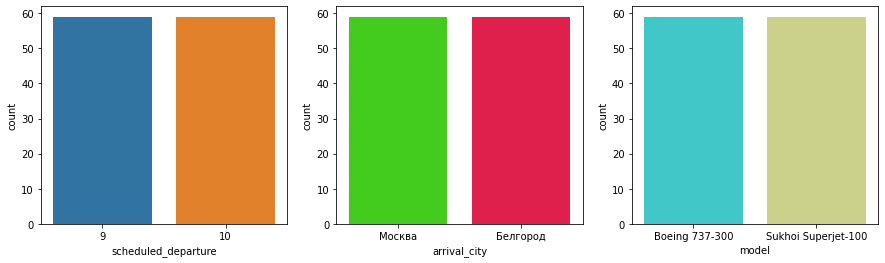

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Вылет осуществляется только в 9 и 10 часов
sns.countplot(df.scheduled_departure.dt.hour, ax=axes[0])

# Самолеты летаеют в Москву и Белгород в равном количестве
sns.countplot(df.arrival_city, ax=axes[1], palette='prism')

# В зависмости от города назначения авиакомпании используют разные модели самолетов
sns.countplot(df.model, ax=axes[2], palette='rainbow')

##### Построим графики на основе прибыли

<AxesSubplot:xlabel='earnings', ylabel='passengers'>

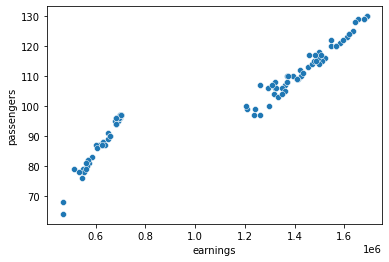

In [18]:
sns.scatterplot(x=df.earnings, y=df.passengers)

<AxesSubplot:xlabel='earnings', ylabel='Count'>

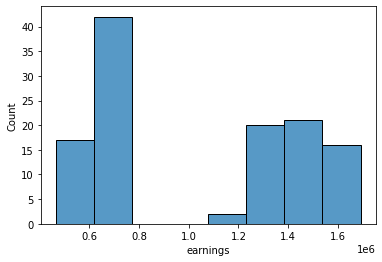

In [19]:
sns.histplot(df.earnings)

In [20]:
df[df.earnings < 800_000].sample(3)

,flight_id,scheduled_departure,scheduled_arrival,scheduled_duration,actual_arrival,actual_duration,departure_city,departure_airport_name,arrival_city,arrival_airport_name,...,passengers,business_passengers,profit,flight_duration,weekday,loading,fuel_consumption,fuel_cost,earnings,share_of_costs
84,136669,2017-01-17 09:25:00+00:00,2017-01-17 10:15:00+00:00,0 years 0 mons 0 days 0 hours 50 mins 0.00 secs,2017-01-17 10:17:00+00:00,0 years 0 mons 0 days 0 hours 51 mins 0.00 secs,Анапа,Витязево,Белгород,Белгород,...,95.0,12.0,752700.0,0.850000,1,0.979381,1.7,65025.0,687675.0,0.086389
89,136720,2017-01-26 09:25:00+00:00,2017-01-26 10:15:00+00:00,0 years 0 mons 0 days 0 hours 50 mins 0.00 secs,2017-01-26 10:19:00+00:00,0 years 0 mons 0 days 0 hours 50 mins 0.00 secs,Анапа,Витязево,Белгород,Белгород,...,95.0,12.0,752700.0,0.833333,3,0.979381,1.7,63750.0,688950.0,0.084695
77,136642,2017-01-30 09:25:00+00:00,2017-01-30 10:15:00+00:00,0 years 0 mons 0 days 0 hours 50 mins 0.00 secs,2017-01-30 10:17:00+00:00,0 years 0 mons 0 days 0 hours 49 mins 0.00 secs,Анапа,Витязево,Белгород,Белгород,...,64.0,10.0,531000.0,0.816667,0,0.659794,1.7,62475.0,468525.0,0.117655


In [21]:
df[df.earnings > 800_000].sample(3)

,flight_id,scheduled_departure,scheduled_arrival,scheduled_duration,actual_arrival,actual_duration,departure_city,departure_airport_name,arrival_city,arrival_airport_name,...,passengers,business_passengers,profit,flight_duration,weekday,loading,fuel_consumption,fuel_cost,earnings,share_of_costs
35,136345,2017-01-24 10:05:00+00:00,2017-01-24 11:45:00+00:00,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,2017-01-24 15:12:00+00:00,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,Анапа,Витязево,Москва,Шереметьево,...,108.0,8.0,1517600.0,1.666667,1,0.830769,2.6,195000.0,1322600.0,0.128492
16,136204,2017-02-23 10:05:00+00:00,2017-02-23 11:45:00+00:00,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,2017-02-23 11:46:00+00:00,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,Анапа,Витязево,Москва,Шереметьево,...,107.0,6.0,1457800.0,1.666667,3,0.823077,2.6,195000.0,1262800.0,0.133763
2,136122,2017-01-08 10:05:00+00:00,2017-01-08 11:45:00+00:00,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,2017-01-08 11:48:00+00:00,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,Анапа,Витязево,Москва,Шереметьево,...,97.0,10.0,1431000.0,1.666667,6,0.746154,2.6,195000.0,1236000.0,0.136268


Как видно выше, на графиках, есть явный пробел в прибыли рейсов. Это обосновывается тем, что рейсы в Белгород менее прибыльные. Поэтому, имеет смысл разделить датасет на 2 части: рейсы в Москву и рейсы в Белгород.

In [22]:
moscow = df[df.arrival_city == "Москва"]
belgorod = df[df.arrival_city == "Белгород"]

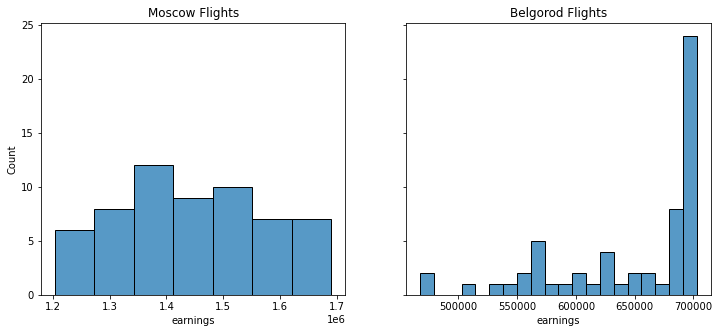

In [23]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

sns.histplot(data=moscow.earnings, ax=axes[0])
axes[0].set_title("Moscow Flights")

sns.histplot(belgorod.earnings, ax=axes[1], bins=20)
axes[1].set_title("Belgorod Flights")

plt.show()

На рейсах в Москву мы видим нормальное распределение признака. Однако, на рейсах в Белгород видно явное смещение вправо.

Text(0.5, 1.0, 'Dependence of Earnings on the Loading - Belgorod')

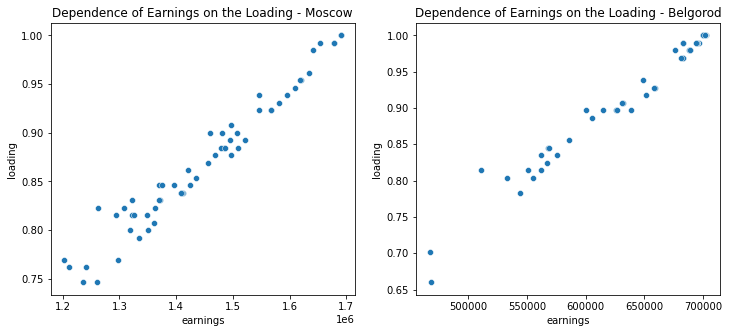

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x=moscow.earnings, y=moscow.loading, ax=axes[0])
axes[0].set_title("Dependence of Earnings on the Loading - Moscow")

sns.scatterplot(x=belgorod.earnings, y=belgorod.loading, ax=axes[1])
axes[1].set_title("Dependence of Earnings on the Loading - Belgorod")

Мы наблюдаем линейный рост заработка в зависимости от количества пассажиров. Явных выбросов не наблюдается. Построим аналогичные графики для пассажиров бизнес-класса.

Text(0.5, 1.0, 'Business Passengers - Belgorod')

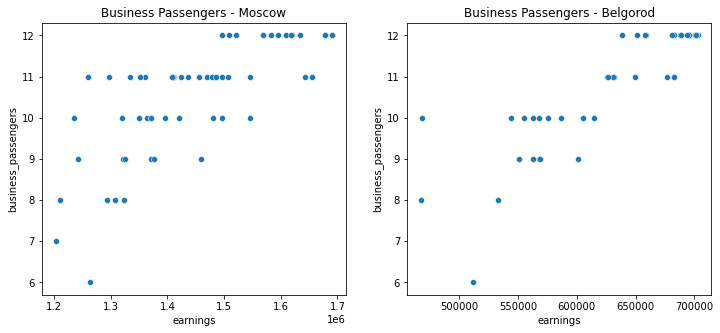

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(y=moscow.business_passengers, x=moscow.earnings, ax=axes[0])
axes[0].set_title("Business Passengers - Moscow")

sns.scatterplot(y=belgorod.business_passengers, x=belgorod.earnings, ax=axes[1])
axes[1].set_title("Business Passengers - Belgorod")

В целом, наблюдается такая же тенденция. Есть несколько выбросов.

Text(0.5, 1.0, 'Earnings by weekday - Belgorod')

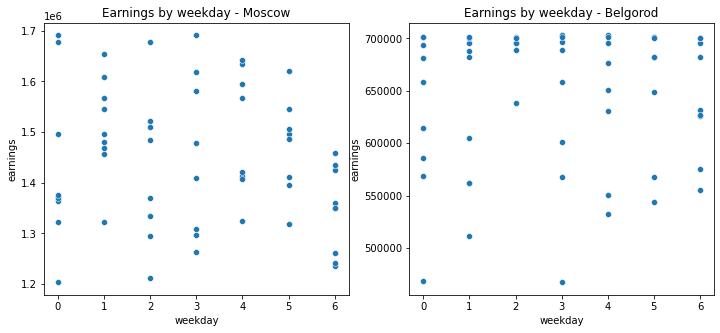

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x=moscow.weekday, y=moscow.earnings, ax=axes[0])
axes[0].set_title("Earnings by weekday - Moscow")

sns.scatterplot(x=belgorod.weekday, y=belgorod.earnings, ax=axes[1])
axes[1].set_title("Earnings by weekday - Belgorod")

На графике видно, что воскресные рейсы в Москву не особо прибыльные. Рейсы в Белгород, в среднем одинаково прибыльные, независимо от дня недели.

Взгляненм на корреляцию признаков.

Text(0.5, 1.0, 'Moscow Flights Correlation')

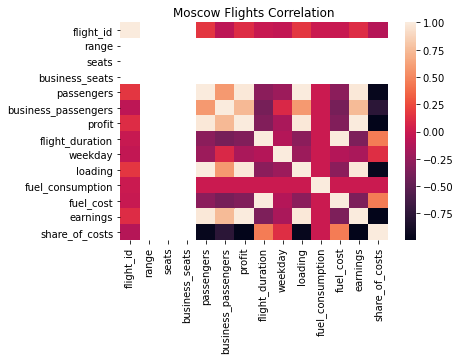

In [27]:
a = sns.heatmap(moscow.corr())
a.set_title("Moscow Flights Correlation")

Text(0.5, 1.0, 'Belgorod Flights Correlation')

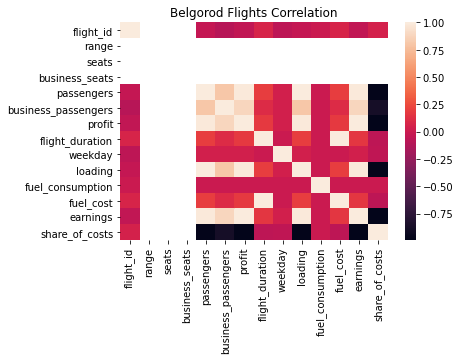

In [28]:
a = sns.heatmap(belgorod.corr())
a.set_title("Belgorod Flights Correlation")

Основываясь на проведенном анализе, можно утверждать, что самые неприбыльные рейсы те, на которых меньше всего пассажиров. Следует выяснить, если в этом какая-то закономерность.

In [29]:
# Рассмотрим малоприбыльные рейсы более внимательно
m_unprofitable = moscow[moscow.earnings < moscow.earnings.quantile(.25)]
b_unprofitable = belgorod[belgorod.earnings < belgorod.earnings.quantile(.25)]

In [30]:
m_unprofitable.scheduled_departure.dt.weekday.value_counts()

6    4
3    3
2    3
0    2
5    1
4    1
1    1
Name: scheduled_departure, dtype: int64

In [37]:
moscow.describe()

,flight_id,range,seats,business_seats,passengers,business_passengers,profit,flight_duration,weekday,loading,fuel_consumption,fuel_cost,earnings,share_of_costs
count,59.000000,59.0,59.0,59.0,59.000000,59.000000,5.900000e+01,59.000000,59.000000,59.000000,5.900000e+01,59.000000,5.900000e+01,59.000000
mean,136298.661017,4200.0,130.0,12.0,113.118644,10.508475,1.642576e+06,1.663842,2.966102,0.870143,2.600000e+00,194669.491525,1.447907e+06,0.119299
std,117.208716,0.0,0.0,0.0,8.896115,1.394235,1.318786e+05,0.016421,2.059177,0.068432,2.687407e-15,1921.296638,1.325473e+05,0.010049
min,136119.000000,4200.0,130.0,12.0,97.000000,6.000000,1.398000e+06,1.633333,0.000000,0.746154,2.600000e+00,191100.000000,1.203000e+06,0.103393
25%,136193.500000,4200.0,130.0,12.0,107.000000,10.000000,1.543200e+06,1.650000,1.000000,0.823077,2.600000e+00,193050.000000,1.350150e+06,0.111050
50%,136284.000000,4200.0,130.0,12.0,112.000000,11.000000,1.628600e+06,1.666667,3.000000,0.861538,2.600000e+00,195000.000000,1.435550e+06,0.119147
75%,136407.000000,4200.0,130.0,12.0,120.000000,11.500000,1.738400e+06,1.666667,5.000000,0.923077,2.600000e+00,195000.000000,1.545350e+06,0.125950
max,136486.000000,4200.0,130.0,12.0,130.000000,12.000000,1.886000e+06,1.716667,6.000000,1.000000,2.600000e+00,200850.000000,1.691000e+06,0.139899


In [38]:
belgorod.describe()

,flight_id,range,seats,business_seats,passengers,business_passengers,profit,flight_duration,weekday,loading,fuel_consumption,fuel_cost,earnings,share_of_costs
count,59.000000,59.0,59.0,59.0,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,5.900000e+01,59.000000,59.000000,59.000000
mean,136768.220339,3000.0,97.0,12.0,90.186441,11.067797,710435.593220,0.834746,2.966102,0.929757,1.700000e+00,63858.050847,646577.542373,0.090722
std,112.072801,0.0,0.0,0.0,8.101670,1.350152,65835.266628,0.010849,2.059177,0.083522,1.791605e-15,829.954308,65691.545521,0.009289
min,136571.000000,3000.0,97.0,12.0,64.000000,6.000000,531000.000000,0.816667,0.000000,0.659794,1.700000e+00,62475.000000,467250.000000,0.081635
25%,136663.500000,3000.0,97.0,12.0,86.500000,10.000000,667350.000000,0.833333,1.000000,0.891753,1.700000e+00,63750.000000,602962.500000,0.083992
50%,136769.000000,3000.0,97.0,12.0,95.000000,12.000000,746400.000000,0.833333,3.000000,0.979381,1.700000e+00,63750.000000,682650.000000,0.085672
75%,136859.000000,3000.0,97.0,12.0,97.000000,12.000000,765300.000000,0.841667,5.000000,1.000000,1.700000e+00,64387.500000,700275.000000,0.096480
max,136956.000000,3000.0,97.0,12.0,97.000000,12.000000,765300.000000,0.850000,6.000000,1.000000,1.700000e+00,65025.000000,702825.000000,0.120056
